In [1]:
using GeoJSON, GLMakie, GeoMakie, Makie

In [2]:
path = "./data/areas_geojson/areas_psmb.geojson"
areas = GeoJSON.read(read(path))
println("areas = ", length(areas))

path = "./data/areas_geojson/areas_psmb_disueltas.geojson"
areas_disueltas = GeoJSON.read(read(path))
println("areas_disueltas = ", length(areas_disueltas))

path = "./data/areas_geojson/centros_psmb.geojson"
centros = GeoJSON.read(read(path))
println("centros = ", length(centros))

areas = 103
areas_disueltas = 103
centros = 644


In [3]:
range = 1:10
println(areas.codigoarea[range])
println(areas_disueltas.nuevo_id[range])

[10002.0, 10204.0, 10207.0, 10218.0, 10219.0, 10221.0, 10222.0, 10224.0, 10227.0, 10228.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [4]:
k = 1
n = length(areas)
flag = ones(Bool,n)
ids = ones(Int,n)
for i = 1:n
    for j = i+1:n
        if flag[j] && (areas_disueltas.geometry[i][:] == areas_disueltas.geometry[j][:])
            ids[j] = k
            flag[j] = false
        end
    end
    if flag[i]
        ids[i] = k
        k = k + 1
    end
end

maximum(ids)

1

In [5]:
areas_disueltas.geometry[1][:] == areas_disueltas.geometry[3][:]

true

---

In [6]:
using LazySets

In [7]:
k = 1
n = length(areas)

Hulls = []
for k = 1:n
    POL = [[areas.geometry[k][1][1][i][1],areas.geometry[k][1][1][i][2]] for i in 1:length(areas.geometry[k][1][1])]
    Hulls = cat(Hulls,[convex_hull(POL)],dims=1)
end

i=1
j=66
!(isempty( VPolygon(Hulls[i]) ∩ VPolygon(Hulls[j])))

false

In [8]:
k=1
flag = ones(Bool,n)
ids = ones(Int,n)
for i = 1:n
    for j = i+1:n
        if flag[j] && !(isempty( VPolygon(Hulls[i]) ∩ VPolygon(Hulls[j])))
            ids[j] = k
            flag[j] = false
        end
    end
    if flag[i]
        ids[i] = k
        k = k + 1
    end
end

ids

103-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
  5
 10
 11
 12
  ⋮
  8
  6
 67
 68
 69
 70
 71
 72
 73
 34
 74
 75

---

## Intersecctions, substractions, etc. using ...  
LazySets ???

**ver https://github.com/JuliaGeo/LibGEOS.jl o similar**

In [2]:
using LazySets, GLMakie, Makie

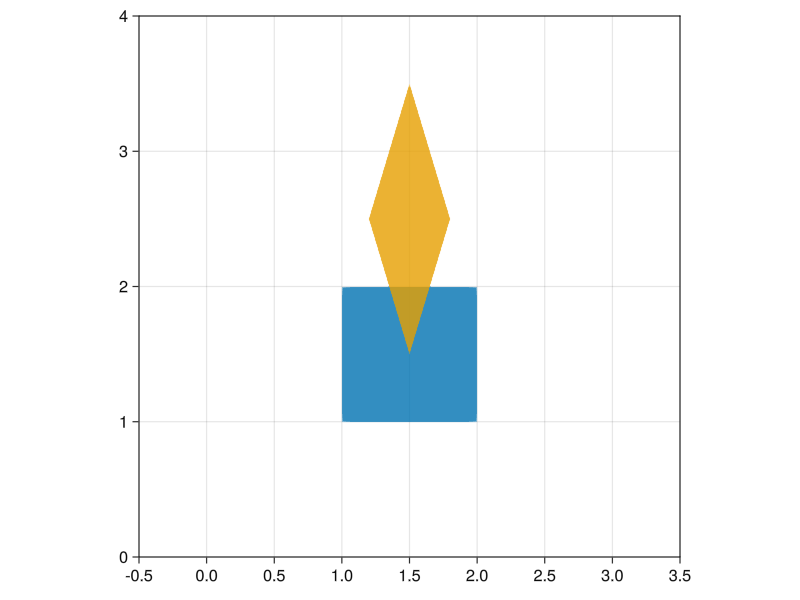

In [84]:
pol_1 = [(1.,1),(1.,2),(2.,2),(2.,1)]
pol_2 = [(1.5,1.5),(1.2,2.5),(1.5,3.5),(1.8,2.5)]
fig = Figure()
ax = Axis(fig[1, 1])

poly!(pol_1)
poly!(pol_2)

xlims!(-.5,3.5)
ylims!(0,4)
ax.aspect = 1

fig


In [97]:
function b2p(POL)
    return [(POL[i][1],POL[i][2]) for i = 1:length(POL)]
end
function p2b(POL)
    return [[POL[i][1],POL[i][2]] for i = 1:length(POL)]
end

SET = VPolygon(p2b(pol_1)) ∪ VPolygon(p2b(pol_2))


UnionSet{Float64, VPolygon{Float64, Vector{Float64}}, VPolygon{Float64, Vector{Float64}}}(VPolygon{Float64, Vector{Float64}}([[1.0, 1.0], [2.0, 1.0], [2.0, 2.0], [1.0, 2.0]]), VPolygon{Float64, Vector{Float64}}([[1.5, 1.5], [1.8, 2.5], [1.5, 3.5], [1.2, 2.5]]))

In [99]:
fig = Figure()
ax = Axis(fig[1, 1])


poly!(SET)

xlims!(-.5,3.5)
ylims!(0,4)
ax.aspect = 1

fig

LoadError: PlotMethodError: no [36mplot[39m method for arguments [36m(::UnionSet{Float64, VPolygon{Float64, Vector{Float64}}, VPolygon{Float64, Vector{Float64}}})[39m. To support these arguments, define
  [36mplot!(::Combined{Any, S} where S<:Tuple{UnionSet{Float64, VPolygon{Float64, Vector{Float64}}, VPolygon{Float64, Vector{Float64}}}})[39m
Available methods are:


---
### GeoInterface, LibGEOS

In [1]:
using GeoInterface, LibGEOS, GLMakie, Makie

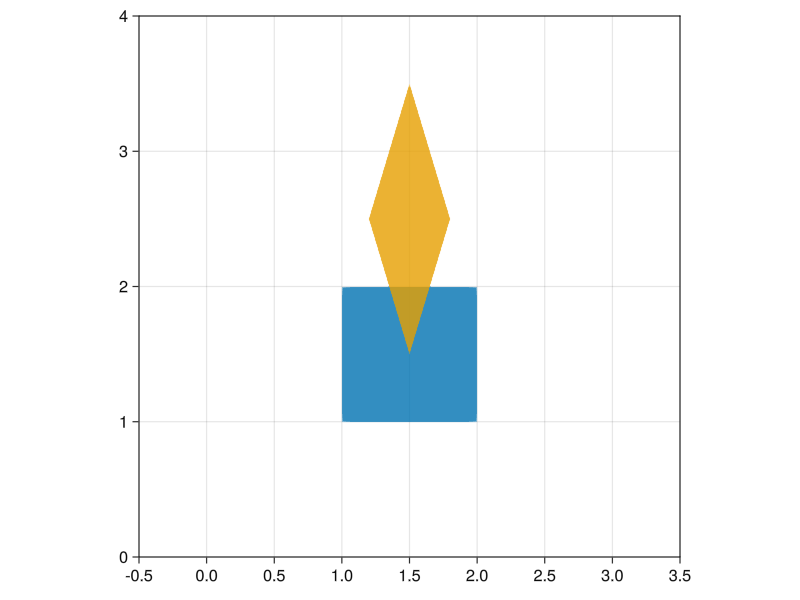

In [5]:
pol_1 = [(1.,1),(1.,2),(2.,2),(2.,1)]
pol_2 = [(1.5,1.5),(1.2,2.5),(1.5,3.5),(1.8,2.5)]
fig = Figure()
ax = Axis(fig[1, 1])

poly!(pol_1)
poly!(pol_2)

xlims!(-.5,3.5)
ylims!(0,4)
ax.aspect = 1

fig


In [13]:
pp = p2b(pol_1)

LibGEOS.createPolygon(pp)

LoadError: MethodError: no method matching createPolygon(::Vector{Vector{Float64}})
[0mClosest candidates are:
[0m  createPolygon([91m::Union{Ptr{Nothing}, LinearRing}[39m) at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:469
[0m  createPolygon([91m::Union{Ptr{Nothing}, LinearRing}[39m, [91m::AbstractVector[39m) at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:457
[0m  createPolygon([91m::Union{Ptr{Nothing}, LinearRing}[39m, [91m::AbstractVector[39m, [91m::LibGEOS.GEOSContext[39m) at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:457
[0m  ...

In [15]:
?LibGEOS.createPolygon

No documentation found.

`LibGEOS.createPolygon` is a `Function`.

```
# 4 methods for generic function "createPolygon":
[1] createPolygon(shell::Union{Ptr{Nothing}, LinearRing}) in LibGEOS at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:469
[2] createPolygon(shell::Union{Ptr{Nothing}, LinearRing}, holes::AbstractVector) in LibGEOS at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:457
[3] createPolygon(shell::Union{Ptr{Nothing}, LinearRing}, holes::AbstractVector, context::LibGEOS.GEOSContext) in LibGEOS at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:457
[4] createPolygon(shell::Union{Ptr{Nothing}, LinearRing}, context::LibGEOS.GEOSContext) in LibGEOS at C:\Users\Usuario\.julia\packages\LibGEOS\oez93\src\geos_functions.jl:469
```
